<a href="https://colab.research.google.com/github/Kristovpsy/ML-PRACTICE/blob/main/Q_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%pip install numpy==1.23.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 62.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for numpy: filename=numpy-1.23.0-cp311-cp311-linux_x86_64.whl size=19730149 sha256=91901891c239e694a573f99e272476e906dec1a8109381209c919592584e3f2b
  Stored in directory: /root/.cache/pip/wheels/6d/36/1a/3ec6b85008bea3151efb003f5d41baa7bf4966cb43c1c2470b
Successfully built numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.0 which is incompatible.
dm-tree 0.1.9 requires numpy>=1.23.3; python_version >= "3.11", but you have nump

In [1]:
import gym

In [2]:
env = gym.make('FrozenLake-v1')

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
print(env.observation_space)
print(env.action_space)
print(env.action_space.sample())
print(env.observation_space.sample)

Discrete(16)
Discrete(4)
1
<bound method Discrete.sample of Discrete(16)>


In [4]:
env.reset()

0

In [5]:
action1 = env.action_space.sample()
action2 = env.action_space.sample()
print(action1, action2)

0 0


In [6]:
new_state, reward, done, info = env.step(action1)
print(new_state, reward, done, info)

0 0.0 False {'prob': 0.3333333333333333}


In [7]:
env.render()

/usr/local/lib/python3.11/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [8]:
import time

In [10]:
from mmap import ACCESS_COPY
import numpy as np
import gym

env = gym.make('FrozenLake-v1')

STATES = env.observation_space.n
ACTIONS = env.action_space.n


/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [12]:
Q = np.zeros((STATES, ACTIONS))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [13]:
EPISODES = 1500 # time used to run the enviroment from the beginning
MAX_STEPS = 150 # max number of steps for each run of the env

LEARNING_RATE = 1.00
GAMMA = 0.98

In [15]:



epsilon = 0.9 # start with a high value
# this parameter will decay over time

def epsilon_greedy_policy(Q, state):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state, :])

In [21]:
import random
rewards =[]
for episode in range(EPISODES):
  state = env.reset()
  for _ in range(MAX_STEPS):
    action = epsilon_greedy_policy(Q, state)
    next_state, reward, done, info = env.step(action)
    # update q values
    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])
    state = next_state
    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break


In [19]:
RENDER = False

In [23]:
print(Q)
print(f"Avg Reward:(sum(rewards)/len(rewards)):")

[[0.00000000e+000 0.00000000e+000 0.00000000e+000 1.18575755e-322]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 1.18575755e-322]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 1.18575755e-322]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 1.18575755e-322]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [5.91395435e-001 5.34574633e-001 4.11099862e-001 5.79567526e-

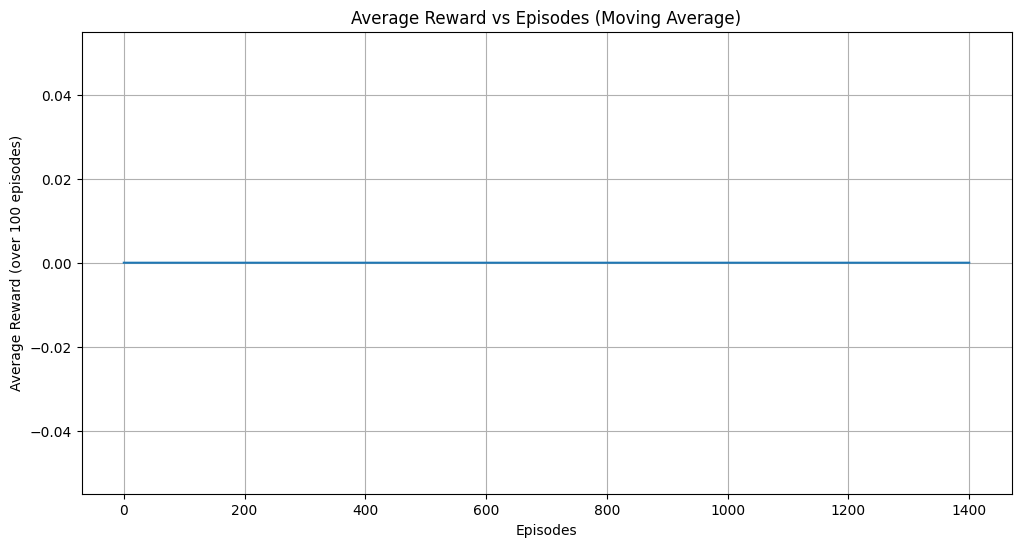

In [27]:
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

window_size = 100 # Adjust the window size as needed
avg_rewards = moving_average(rewards, window_size)

plt.figure(figsize=(12, 6))
plt.plot(avg_rewards)
plt.xlabel('Episodes')
plt.ylabel(f'Average Reward (over {window_size} episodes)')
plt.title('Average Reward vs Episodes (Moving Average)')
plt.grid(True)
plt.show()